# Pandas dataframes
Pandas is our primary library for manipulating and managing tabular data. Here we'll introduce Panda's basic DataFrame data structure.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image, display

datadir = '/content/drive/My Drive/Courses/672/Notebooks/Notebooks2023/data/'
imagesdir = '/content/drive/My Drive/Courses/672/Notebooks/Notebooks2023/images/'
renderer = None   # change to 'notebook' to embed in HTML

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

Mounted at /content/drive


In [2]:
!pip install plotly

In [3]:
renderer = None

def show(fig):
  fig.show(renderer=renderer)

import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

A DataFrame represents a spreadsheet-like data structure containing an ordered series of columns, each of some type. The DataFrame has both a row and a column index.

One way to build a DataFrame is to construct it on a dictionary that maps column names (strings) to lists of column values.

In [4]:
d = { 'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
      'pop': [1.5, 1.7, 3.6, 2.4, 2.9],
      'year': [2000, 2001, 2002, 2001, 2002],}
df = pd.DataFrame(d)
df

,state,pop,year
0,Ohio,1.5,2000
1,Ohio,1.7,2001
2,Ohio,3.6,2002
3,Nevada,2.4,2001
4,Nevada,2.9,2002


In [5]:
cols = ['state', 'year', 'pop']
df2 = df[cols]
df2

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Each column of a DataFrame is of type Series. In pandas, a Series is a one-dimensional array and an associated array of data labels called its *index*.

In [6]:
yr = df['year']
yr, type(yr)

(0    2000
 1    2001
 2    2002
 3    2001
 4    2002
 Name: year, dtype: int64,
 pandas.core.series.Series)

We can view a Serie's values and indexes.

In [7]:
yr.values, yr.index

(array([2000, 2001, 2002, 2001, 2002]), RangeIndex(start=0, stop=5, step=1))

We can access the elements of a Series by index.

In [8]:
yr[0], yr[1], yr[2]

(np.int64(2000), np.int64(2001), np.int64(2002))

When we extract a column from a DataFrame, the resulting Series is a view or window on the underlying dataFrame.

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'
print(df, '\n')
yr[0] = 2009
print(df)

    state  pop  year
0    Ohio  1.5  2000
1    Ohio  1.7  2001
2    Ohio  3.6  2002
3  Nevada  2.4  2001
4  Nevada  2.9  2002 

    state  pop  year
0    Ohio  1.5  2009
1    Ohio  1.7  2001
2    Ohio  3.6  2002
3  Nevada  2.4  2001
4  Nevada  2.9  2002


We can use *iloc* to index a row by index, yielding a *copy* from the DataFrame.

In [10]:
row1 = df.iloc[1]
print(type(row1))
print(row1)
print(row1.values, row1.index)

<class 'pandas.core.series.Series'>
state    Ohio
pop       1.7
year     2001
Name: 1, dtype: object
['Ohio' np.float64(1.7) np.int64(2001)] Index(['state', 'pop', 'year'], dtype='object')


In [11]:
row1.state = 'Florida'
print(row1, '\n')
print(df)

state    Florida
pop          1.7
year        2001
Name: 1, dtype: object 

    state  pop  year
0    Ohio  1.5  2009
1    Ohio  1.7  2001
2    Ohio  3.6  2002
3  Nevada  2.4  2001
4  Nevada  2.9  2002


Two things to note:

+ Series are used to represent both individual rows and columns. Series are versatile since the Series index can be of any type.
+ Column series are views but row series are copies. We can use the copy method to create an independent copy.

In [12]:
# Make a column series copy
print(df, '\n')
pop = df['pop'].copy()
print(pop)
pop[0] = 29.8
print(pop, '\n')
print(df)

    state  pop  year
0    Ohio  1.5  2009
1    Ohio  1.7  2001
2    Ohio  3.6  2002
3  Nevada  2.4  2001
4  Nevada  2.9  2002 

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
Name: pop, dtype: float64
0    29.8
1     1.7
2     3.6
3     2.4
4     2.9
Name: pop, dtype: float64 

    state  pop  year
0    Ohio  1.5  2009
1    Ohio  1.7  2001
2    Ohio  3.6  2002
3  Nevada  2.4  2001
4  Nevada  2.9  2002


## Plotting dataframes
When we use Plotly Express to plot, we generally provide a dataframe as the first argument to the plotting command, and then supply column names to identify the data.

In [13]:
size = 10
columns = ['a', 'b', 'c']
d = dict(x=np.arange(1, size+1))
for c in columns:
  d[c] = np.random.randint(1, 11, size=size)
df = pd.DataFrame(d)
df

,x,a,b,c
0,1,3,6,2
1,2,6,3,8
2,3,5,6,1
3,4,8,2,6
4,5,7,2,8
5,6,5,1,2
6,7,8,7,10
7,8,8,8,10
8,9,5,3,9
9,10,9,10,7


### Line charts

In [14]:
tickvals = list(range(1, 11))
fig = px.line(df, x='x', y=['b','c'], markers=True)
fig.update_xaxes(tickmode='array', tickvals=tickvals)
fig.update_yaxes(tickmode='array', tickvals=tickvals)
show(fig)

In [15]:
print(columns)

['a', 'b', 'c']


In [16]:
fig = px.line(df, x='x', y=columns, markers=True)
fig.update_xaxes(tickmode='array', tickvals=tickvals)
fig.update_yaxes(tickmode='array', tickvals=tickvals)
show(fig)

### Scatterplots

In [17]:
fig = px.scatter(df, x='x', y=columns)
fig.update_xaxes(tickmode='array', tickvals=tickvals)
fig.update_yaxes(tickmode='array', tickvals=tickvals)
fig.update_traces(marker_size=10)
show(fig)

In [18]:
df

,x,a,b,c
0,1,3,6,2
1,2,6,3,8
2,3,5,6,1
3,4,8,2,6
4,5,7,2,8
5,6,5,1,2
6,7,8,7,10
7,8,8,8,10
8,9,5,3,9
9,10,9,10,7


In [19]:
fig = px.scatter(df, x='x', y='b', color='b', color_continuous_scale='Plotly3')
fig.update_xaxes(tickmode='array', tickvals=tickvals)
fig.update_yaxes(tickmode='array', tickvals=tickvals)
fig.update_traces(marker_size=10)
show(fig)

In [20]:
# unpivot frame df
df2 = pd.melt(df, id_vars='x', value_vars=columns)
df2.columns = ['x', 'label', 'value']
df2

,x,label,value
0,1,a,3
1,2,a,6
2,3,a,5
3,4,a,8
4,5,a,7
5,6,a,5
6,7,a,8
7,8,a,8
8,9,a,5
9,10,a,9


In [21]:
df.head(15)

,x,a,b,c
0,1,3,6,2
1,2,6,3,8
2,3,5,6,1
3,4,8,2,6
4,5,7,2,8
5,6,5,1,2
6,7,8,7,10
7,8,8,8,10
8,9,5,3,9
9,10,9,10,7


In [22]:
fig = px.scatter(df2, x='x', y='value', color='label')
fig.update_xaxes(tickmode='array', tickvals=tickvals)
fig.update_yaxes(tickmode='array', tickvals=tickvals)
fig.update_traces(marker_size=20)
show(fig)

In [23]:
color_map = {'a': 'red', 'b': 'blue', 'c': 'purple'}
fig = px.scatter(df2, x='x', y='value', color='label', color_discrete_map=color_map)
fig.update_xaxes(tickmode='array', tickvals=tickvals)
fig.update_yaxes(tickmode='array', tickvals=tickvals)
fig.update_traces(marker_size=20)
show(fig)

### Stacked and grouped bar charts

In [24]:
fig = px.bar(df2, x='x', y='value', color='label')
fig.update_xaxes(tickmode='array', tickvals=tickvals)
show(fig)

In [25]:
fig = px.bar(df2, x='x', y='value', color='label', color_discrete_map=color_map)
fig.update_xaxes(tickmode='array', tickvals=tickvals)
show(fig)

In [26]:
fig = px.bar(df2, x='x', y='value', color='label', color_discrete_map=color_map, barmode='group')
fig.update_xaxes(tickmode='array', tickvals=tickvals)
fig.update_yaxes(tickmode='array', tickvals=tickvals)
show(fig)

### Examples using the Iris dataset
This dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other two, whereas those other two are not linearly separable.

Attribute information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. classes: Setosa, Versicolour, Verginica

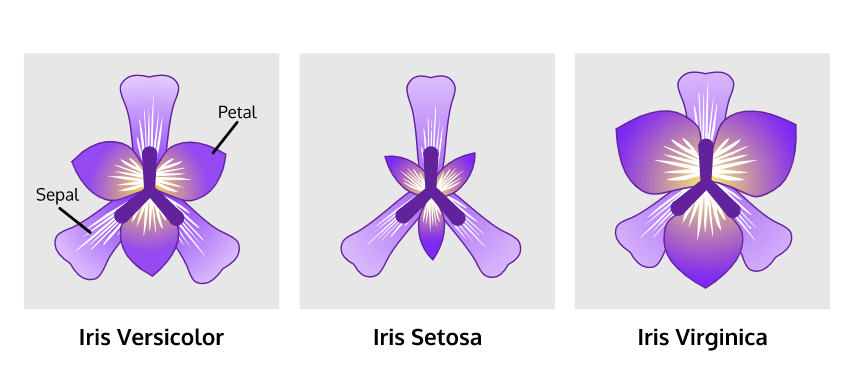

In [ ]:
display_images(['iris.png'])

In [27]:
df = px.data.iris() # iris is a pandas DataFrame
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [28]:
df[df['species'] == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2
53,5.5,2.3,4.0,1.3,versicolor,2
54,6.5,2.8,4.6,1.5,versicolor,2


In [29]:
fig = px.scatter(df, x="sepal_width", y="petal_length", color='species')
fig.update_traces(marker_size=10)
show(fig)

In [30]:
fig = px.scatter(df, x="petal_width", y="petal_length", color='species', size='sepal_width')
show(fig)

In [ ]:
fig = px.scatter(df, x="petal_width", y="petal_length", opacity=1.0, color='species', size='sepal_length')
show(fig)

In [ ]:
# an ordinary least squares regression by species
fig = px.scatter(df, x="petal_width", y="petal_length", color="species", facet_row="species", trendline='ols')
show(fig)

In [ ]:
# a scatterplot matrix (splom)
dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=dimensions, color='species')
show(fig)

We can use [parallel coordinates](https://plotly.com/python/parallel-coordinates-plot/) to view each record over multivariate numeric data. Each axis corresponds to one dimension and defines a scale for that dimension.

In [ ]:
fig = px.parallel_coordinates(df, color="species_id", dimensions=dimensions, color_continuous_scale='viridis')
show(fig)